In [1]:
import math

import seaborn as sns

In [2]:
# configuration

campaigns = 10
campaign_target = 10_000
campaign_bids = [i + 1 for i in range(campaigns)]
campaign_budgets = [b * campaign_target for b in campaign_bids]

In [3]:
# number of time windows
T = 24 * 60
# normalized uniform distribution
norm_dist = [1 / T for i in range(T)]

In [4]:
impressions = campaigns * campaign_target

dist = [math.ceil(p * impressions) for p in norm_dist]

In [5]:
assert sum(dist) >= impressions

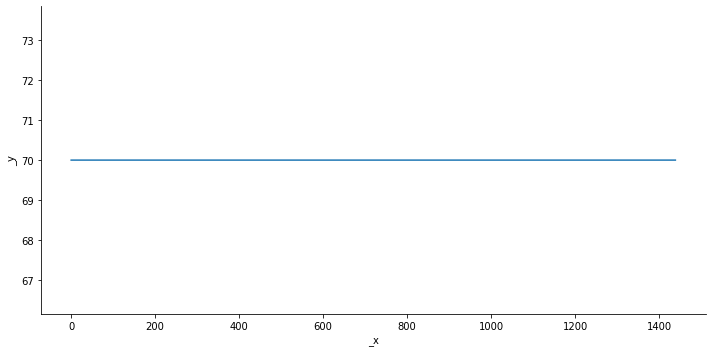

In [6]:
sns.relplot(x=range(len(dist)), y=dist, kind="line", aspect=2)

In [7]:
def cumsum(arr):
    res = []
    s = 0
    for x in arr:
        s += x
        res.append(s)
    return res

In [8]:
forecast = cumsum(dist)

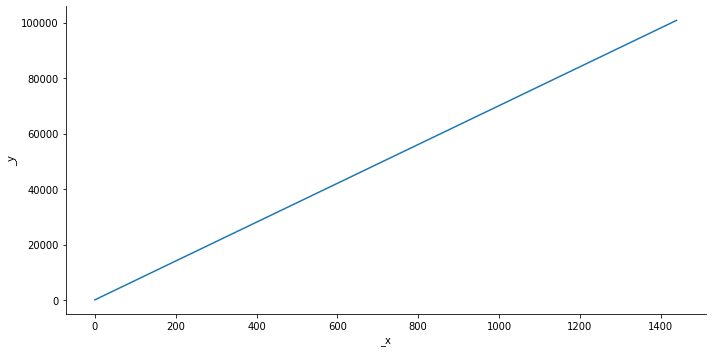

In [9]:
sns.relplot(x=range(len(forecast)), y=forecast, kind="line", aspect=2)

In [10]:
actual = dist

In [11]:
from collections import defaultdict

daily_budgets = [b for b in campaign_budgets]

wins = defaultdict(lambda: [0 for t in range(T)])

for t in range(1):
    # the begining of the time window
    payouts = []
    for i in range(actual[t]):
        bids = []

        for c in range(campaigns):
            if daily_budgets[c] >= campaign_bids[c]:
                bids.append((campaign_bids[c], c))

        if bids:
            sorted(bids, reverse=True)
            b, c = bids[0]
            # first price auction
            payouts.append((c, b))
            wins[c][t] += 1

    # the end of the time window
    for c, b in payouts:
        daily_budgets[c] -= b

In [12]:
for c, vs in wins.items():
    print(c)
    # plt.figure()
    # sns.relplot(x=range(len(vs)), y=vs, kind="line", aspect=2)

0


In [13]:
import random


def random_noise(noise):
    return random.random() * 2 * noise - noise


def make_dist(base_dist, n, noise):
    return [round(p * n * (1 + random_noise(noise))) for p in base_dist]

In [14]:
campaigns = 10
bids = [i + 1 for i in range(campaigns)]

total_imp = campaigns * 10_000

ideal_forecast = make_dist(base_dist, total_imp, 0)
forecast = make_dist(base_dist, total_imp, 0.05)

NameError: name 'base_dist' is not defined

In [ ]:
def plot_vals(arr):
    x = [i for i in range(len(arr))]
    sns.relplot(x=x, y=arr, kind="line", height=4, aspect=3)

In [ ]:
plot_vals(base_dist)

In [ ]:
plot_vals(ideal_forecast)

In [ ]:
plot_vals(forecast)

In [ ]:
forecast_cumsum = cumsum(forecast)

In [ ]:
plot_vals(forecast_cumsum)